<a href="https://colab.research.google.com/github/KDM777/tensorflow-/blob/main/%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_(Gradient_Descent)_(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법 (Gradient Descent)

기본 개념은 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 극값에 이를 때까지 반복시키는 것입니다.

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식입니다.

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

Image(url='https://img.pngio.com/scikit-learn-batch-gradient-descent-versus-stochastic-gradient-descent-png-592_319.png')

## 샘플에 활용할 데이터 셋 만들기

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

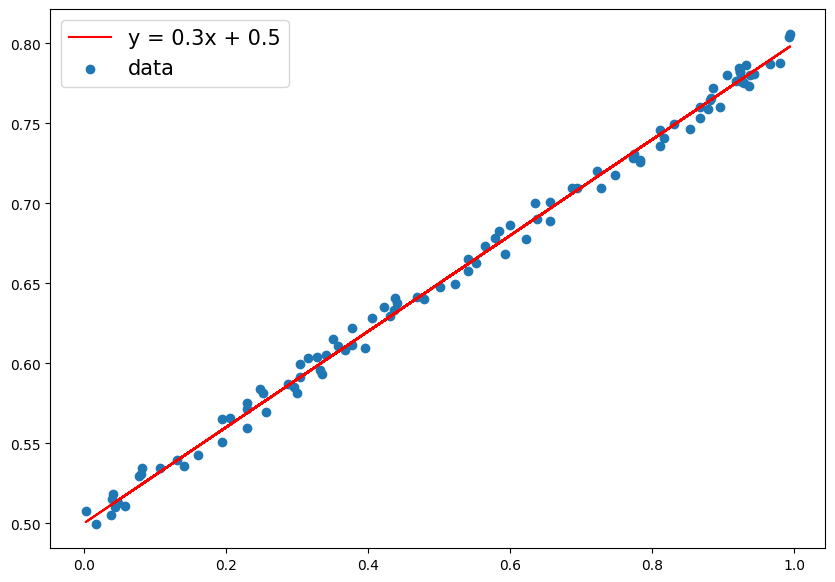

w: 0.3, b: 0.5


In [ ]:
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
x

array([0.10672803, 0.40531678, 0.58407202, 0.04344011, 0.35117423,
       0.35704124, 0.52176269, 0.43734289, 0.36771075, 0.86646301,
       0.592822  , 0.2993923 , 0.24820739, 0.04008908, 0.92514751,
       0.74727339, 0.29551053, 0.81605238, 0.6936362 , 0.33449427,
       0.65673107, 0.68746552, 0.34012801, 0.53996999, 0.3160076 ,
       0.08090398, 0.43017913, 0.65563463, 0.99271785, 0.16138208,
       0.04136275, 0.89593773, 0.0818086 , 0.03756882, 0.1941923 ,
       0.50086993, 0.05827225, 0.25264111, 0.91814237, 0.86686257,
       0.57831803, 0.3774788 , 0.44070035, 0.22924538, 0.85363122,
       0.2301379 , 0.25626562, 0.88604318, 0.04748076, 0.979854  ,
       0.43607107, 0.60031527, 0.20641115, 0.47809534, 0.3772305 ,
       0.33301409, 0.63745657, 0.00265718, 0.01687846, 0.90520612,
       0.22894771, 0.13085775, 0.30425008, 0.07787573, 0.82986057,
       0.54086292, 0.55180245, 0.93145041, 0.42303366, 0.81087615,
       0.14095517, 0.9654608 , 0.8108217 , 0.6347031 , 0.92848

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정해 줍니다.

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
w,b

(0.8229891868439351, 0.034532446726376675)

`y_hat`은 `prediction`은 값 입니다. 즉, 가설함수에서 실제 값 (y)를 뺀 함수를 정의합니다.

In [ ]:
# 코드를 입력해 주세요
y_hat = w*x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function을 정의 합니다.

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의합니다.

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표와 관련 있습니다.

In [ ]:
# 코드를 입력해 주세요
error = ((y_hat - y) **2).mean()
error

0.061356195372162754

## 학습률 (Learning Rate)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png',width=750)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [ ]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate) 하이퍼 파라미
learning_rate = 0.5

In [ ]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w*x+b

    # 코드를 입력해 주세요
    error = ((y_hat-y)**2).mean()
    if error < 0.00005:
        break

    # 코드를 입력해 주세요
    w = w - learning_rate * ((y_hat-y)*x).mean()
    b = b - learning_rate * (y_hat-y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.49034, b = 0.49445 error = 0.08652
 5 w = 0.42206, b = 0.43131 error = 0.00158
10 w = 0.40138, b = 0.44253 error = 0.00111
15 w = 0.38431, b = 0.45223 error = 0.00079
20 w = 0.37006, b = 0.46033 error = 0.00056
25 w = 0.35815, b = 0.46710 error = 0.00040
30 w = 0.34822, b = 0.47274 error = 0.00029
35 w = 0.33992, b = 0.47746 error = 0.00021
40 w = 0.33299, b = 0.48140 error = 0.00016
45 w = 0.32721, b = 0.48468 error = 0.00012
50 w = 0.32238, b = 0.48743 error = 0.00009
55 w = 0.31835, b = 0.48972 error = 0.00008
60 w = 0.31498, b = 0.49163 error = 0.00006
65 w = 0.31217, b = 0.49323 error = 0.00005
------------------------------------------------------------
69 w = 0.3, b = 0.5 error = 0.00005


**시각화**

학습 진행(epoch)에 따른 오차를 시각화 합니다.

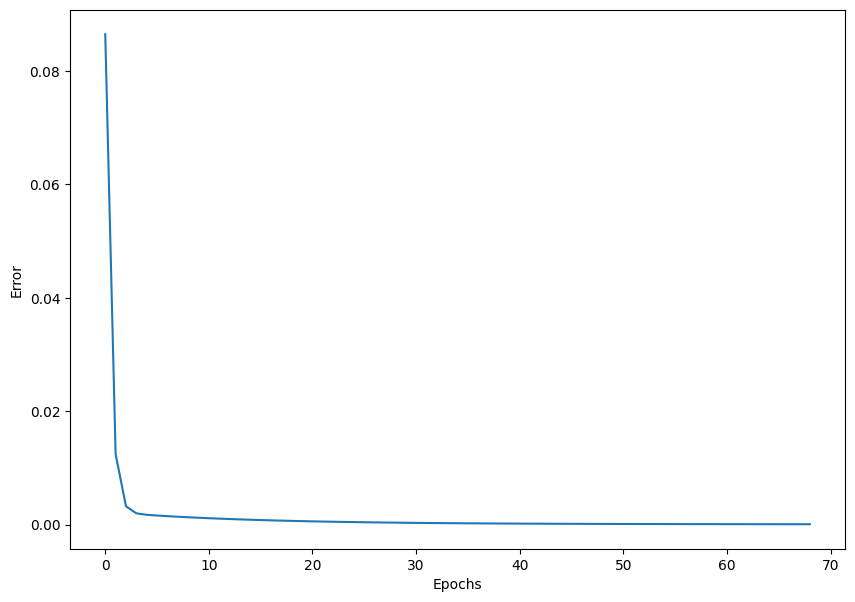

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()